In [2]:
import math
import numpy as np
import torch as torch
import matplotlib.pyplot as plt


func = "cos(exp(x))/sin(ln(x))"


In [3]:
def get_data():
    data = []
    targets = []
    i = 0;
    for batch_i in np.arange(2., 4.01, 0.01): 
        data.append([batch_i])
        targets.append([math.cos(math.exp(data[i][0]))/math.sin(math.log(data[i][0], math.e))])
        # targets.append([0.2 + (0.4 * (data[i][0] ** 2)) + (0.3 * data[i][0] * math.sin(15 * data[i][0])) + (0.05 * math.cos(50 * data[i][0]))])
        i += 1
    return torch.FloatTensor(data), torch.FloatTensor(targets)

In [4]:
def get_data_sin():
    data = []
    targets = []
    i = 0;
    for batch_i in np.arange(0.0, 15.01, 0.1): 
        data.append([batch_i])
        targets.append([math.sin(2*data[i][0])/(x*x)])
        i += 1
    return torch.FloatTensor(data), torch.FloatTensor(targets)

In [5]:
def get_x_y_from_tensor(tensor):
    x_points = []
    y_points = []
    ic = 2.0
    for i in range(tensor.size()[0]):
        x_points.append(ic)
        y_points.append(tensor[i].item())
        ic += 0.01
    return x_points, y_points

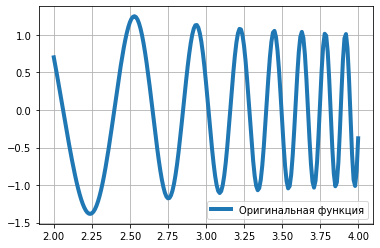

In [10]:
train_data, train_targets = get_data()
x_points, y_points = get_x_y_from_tensor(train_data)
plt.plot(x_points, train_targets, linewidth=4, label="Оригинальная функция")
plt.grid()
plt.legend()
plt.show()

In [7]:
import random

def shuffle_data(train_data, train_targets):
    dat_n_tar = list()
    shuffled_data = list()
    shuffled_targets = list()
    for i in range(len(train_targets)):
        dat_n_tar.append([train_data[i].item(), train_targets[i].item()])
    random.shuffle(dat_n_tar)
    for data in dat_n_tar:
        shuffled_data.append([data[0]])
        shuffled_targets.append([data[1]])
    return torch.FloatTensor(shuffled_data), torch.FloatTensor(shuffled_targets)

In [8]:
import torch.nn as nn
import torch.optim as optim

learning_rate = 0.01
input_dimension = 1
hidden_dimension = 5
output_dimension = 1
epochs = 20000

three_layer_net = nn.Sequential(
        nn.Linear(input_dimension, hidden_dimension),
        nn.Sigmoid(),
        nn.Linear(hidden_dimension, output_dimension)
    )

loss_fn = nn.SmoothL1Loss(size_average=False)
optimizer = optim.Adam(three_layer_net.parameters(), lr=learning_rate)

for epoch in range(epochs):
    # train, targets = shuffle_data(train_data, train_targets)
    preds = three_layer_net(train_data)
    loss = loss_fn(preds, train_targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        print(epoch, "эпоха")
    
print("Обучение окончено")

c:\users\pahan\appdata\local\programs\python\python39\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 эпоха
500 эпоха
1000 эпоха
1500 эпоха
2000 эпоха
2500 эпоха
3000 эпоха
3500 эпоха
4000 эпоха
4500 эпоха
5000 эпоха
5500 эпоха
6000 эпоха
6500 эпоха
7000 эпоха
7500 эпоха
8000 эпоха
8500 эпоха
9000 эпоха
9500 эпоха
10000 эпоха
10500 эпоха
11000 эпоха
11500 эпоха
12000 эпоха
12500 эпоха
13000 эпоха
13500 эпоха
14000 эпоха
14500 эпоха
15000 эпоха
15500 эпоха
16000 эпоха
16500 эпоха
17000 эпоха
17500 эпоха
18000 эпоха
18500 эпоха
19000 эпоха
19500 эпоха
Обучение окончено


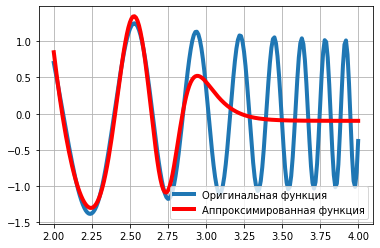

In [9]:
train_data, train_targets = get_data()
x_original_points, y_original_points = get_x_y_from_tensor(train_data)

preds = three_layer_net(train_data)
x_approximation_points, y_approximation_points = get_x_y_from_tensor(preds)

# print(preds)

plt.plot(x_original_points, train_targets, linewidth=4, label="Оригинальная функция")
plt.plot(x_approximation_points, y_approximation_points, color="red", linewidth=4, label="Аппроксимированная функция")
plt.grid()
plt.legend()
plt.show()